In [2]:
# !pip install --user matplotlib seaborn

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline

In [3]:
int(1E6)

1000000

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa

In [5]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpu_devices))
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

Num GPUs Available:  1


In [6]:
from tensorflow.keras.models import load_model

In [7]:
from bert.layers import Attention, Transformer, DenseNoMask, PositionEmbedding
from bert.optimizers import ECE, masked_sparse_categorical_crossentropy

In [8]:
# log = pd.read_csv('/scratch/pstjohn/transformer_base_512_checkpoints/log.csv')

In [9]:
# from bert.model import create_albert_model
# model = create_albert_model(model_dimension=512,
#                             transformer_dimension=512 * 4,
#                             num_attention_heads=512 // 64,
#                             num_transformer_layers=6,
#                             vocab_size=22,
#                             dropout_rate=0.)

In [10]:
model = load_model('/scratch/pstjohn/lr4_fixed_code_no_weight_share_checkpoints/ckpt.h5', 
                   custom_objects={
                       'Transformer': Transformer,
                       'Attention': Attention,
                       'DenseNoMask': DenseNoMask,
                       'PositionEmbedding': PositionEmbedding,
                       'masked_sparse_categorical_crossentropy': masked_sparse_categorical_crossentropy,
                       'ECE': ECE})

In [11]:
from bert.dataset import create_masked_input_dataset

valid_data = create_masked_input_dataset(
    sequence_path='../uniparc_data/sequences_valid.txt',
    max_sequence_length=512,
    batch_size=12)

In [12]:
masked_seq, true_values = next(iter(valid_data))
ECE(true_values, model.predict(masked_seq))

<tf.Tensor: id=20318, shape=(), dtype=float32, numpy=11.934926>

In [13]:
predictions = tf.nn.softmax(model.predict(masked_seq))

In [14]:
masked_entries = tf.not_equal(true_values, 0)
y_true_mask = tf.boolean_mask(true_values, masked_entries)
y_pred_mask = tf.boolean_mask(predictions, masked_entries)

In [15]:
pd.DataFrame(y_pred_mask.numpy())

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.000035,0.000036,0.086127,0.003770,0.020290,0.009483,0.016820,0.022105,0.022848,0.035871,...,0.006951,0.054799,0.065714,0.023739,0.048118,0.252677,0.251880,0.020337,0.002170,0.007598
1,0.000034,0.000035,0.114815,0.006216,0.056634,0.028095,0.040278,0.055626,0.037142,0.047430,...,0.020397,0.033565,0.047731,0.028143,0.070204,0.063319,0.079995,0.082594,0.013017,0.023579
2,0.000057,0.000059,0.073815,0.007174,0.025209,0.262969,0.041977,0.049644,0.020668,0.045190,...,0.007841,0.008784,0.085147,0.011633,0.066704,0.027329,0.042546,0.091683,0.023653,0.020647
3,0.000039,0.000039,0.110573,0.004757,0.057635,0.030937,0.043614,0.069049,0.037568,0.040231,...,0.014877,0.021381,0.038828,0.031794,0.116716,0.039479,0.069637,0.089727,0.020424,0.024180
4,0.000022,0.000023,0.053992,0.001840,0.040045,0.594587,0.012813,0.034413,0.011205,0.012289,...,0.007972,0.008911,0.017105,0.014763,0.038345,0.019917,0.021888,0.041529,0.006270,0.015300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,0.000030,0.000030,0.104335,0.009405,0.003209,0.004053,0.069803,0.087960,0.002056,0.173715,...,0.022695,0.006165,0.051542,0.003581,0.001895,0.051769,0.047806,0.161621,0.010225,0.014656
425,0.000028,0.000028,0.057430,0.010069,0.004574,0.004185,0.058592,0.063891,0.003295,0.065426,...,0.428968,0.012163,0.018435,0.006442,0.002338,0.037457,0.036857,0.058432,0.007401,0.023985
426,0.000040,0.000039,0.051068,0.007576,0.009480,0.010516,0.129309,0.026754,0.016257,0.148942,...,0.030952,0.015783,0.018713,0.011388,0.038934,0.039834,0.032128,0.099663,0.019916,0.063120
427,0.000043,0.000045,0.037472,0.003521,0.014150,0.020134,0.063483,0.024339,0.361802,0.067302,...,0.016729,0.018714,0.016980,0.017627,0.038889,0.038678,0.021784,0.044577,0.010760,0.029300


In [16]:
aas = ['0', 'MASK', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
confusion_mat = pd.DataFrame(y_pred_mask.numpy()).groupby(y_true_mask.numpy()).mean()
confusion_mat.columns = aas
confusion_mat.index = aas[2:]

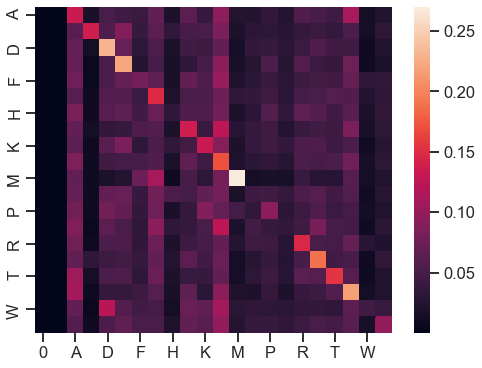

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_mat)

In [18]:
model.layers

In [46]:
inputs = tf.keras.Model(model.layers[1].input, model.layers[1].output)(masked_seq)
inputs._keras_mask

<tf.Tensor: id=20764, shape=(12, 512), dtype=bool, numpy=
array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ..., False, False, False]])>

In [31]:
transformer = model.layers[2]

In [32]:
self = transformer.attention_layer
mask = inputs._keras_mask
training=True

from bert.attention_utils import create_attention_mask, relative_attention_inner, initializer

In [33]:
input_shape = tf.shape(inputs) # [B, S, N*H]

# query and key can be the same vector
qk = self.transpose_scores(self.qk_layer(inputs))  # [B,N,S,H]
value = self.transpose_scores(self.value_layer(inputs))  # [B,N,S,H]

# Equation 1 of "Attention is all you need"
attention_scores = self.calculate_attention(qk, input_shape)  # [B,N,S,S]

In [34]:
inputs.shape

TensorShape([12, 512, 512])

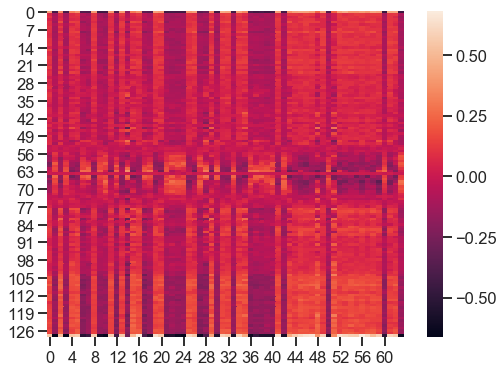

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(self.relations_keys_embedding.weights[0].numpy())

In [36]:
# zero out masked values
attention_mask = self.create_attention_mask(input_shape, mask)
attention_scores = attention_scores * 1000 + (1. - attention_mask) * -10000.0
attention_probs = tf.nn.softmax(attention_scores)  # [B,N,S,S]

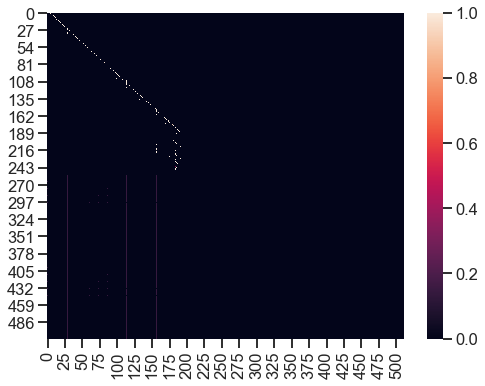

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(attention_probs[2, 0].numpy())

In [41]:
context_layer = tf.matmul(attention_probs, value)  # [B,N,S,S]

In [42]:
context_layer.shape

TensorShape([12, 8, 512, 64])

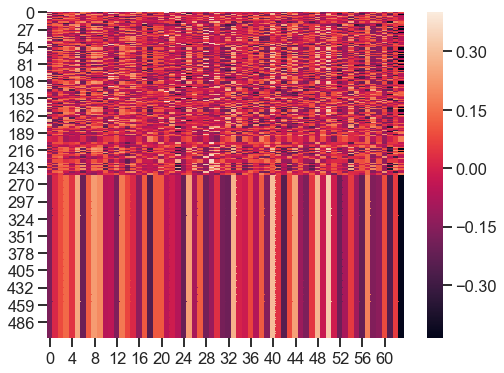

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(context_layer[2, 0].numpy())

In [139]:
context_layer = tf.transpose(a=context_layer, perm=[0, 2, 1, 3])            

In [140]:
context_layer.shape

TensorShape([12, 605, 8, 64])

In [141]:
output_shape = [input_shape[0], input_shape[1], self.num_heads*self.units]
context_layer = tf.reshape(context_layer, output_shape)

In [142]:
context_layer.shape

TensorShape([12, 605, 512])

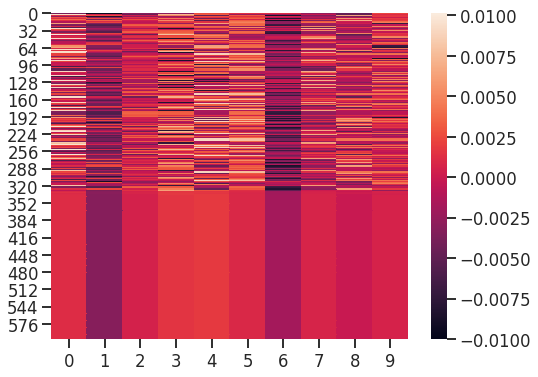

In [145]:
plt.figure(figsize=(8,6))
sns.heatmap(context_layer[0, :, :10].numpy())

In [ ]:
mask = inputs._keras_mask
attention_mask = self.create_attention_mask(mask)
attention_scores_mask = attention_scores + (1. - attention_mask) * -10000.0
attention_probs = tf.nn.softmax(attention_scores_mask)  # [B,N,S,S]
context_layer = tf.matmul(attention_probs, value)  # [B,N,S,S]

input_shape  = tf.shape(inputs)
output_shape = [input_shape[0], input_shape[1], self.num_heads*self.units]
# context_layer = tf.reshape(context_layer, output_shape)

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(attention_mask[3, 0].numpy())

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(attention_scores[3, 0].numpy())

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(attention_scores_mask[3, 0].numpy())

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(attention_probs[3, 0].numpy())

In [ ]:
context_layer.shape

In [ ]:
context_layer.shape

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(tf.reshape(tf.transpose(a=context_layer, perm=[0, 2, 1, 3]), input_shape)[3].numpy())